In [16]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
#warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from sklearn.metrics import mean_squared_error

import pickle
import simplejson as json

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a few plotting defaults
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'
plt.rcParams["figure.figsize"] = [16,9]

pd.options.display.max_columns = 150

df = pd.read_csv("/users/akuppam/documents/Hprog/Py/rnb1015_2.csv")
df.head(5)

,date,region,marketing,visits,br,inq,gb,cb,nb,ss,ts,listings
0,1/1/16,AMR,NotPaid,1256288,6043,66022,6071,571,5500,485968.08000,144695.894200,10242216
1,1/1/16,AMR,Paid,189297,1092,11806,743,2,741,0.00000,14138.809600,2133795
2,1/1/16,UK,NotPaid,201797,435,9662,436,33,403,72698.92472,8317.105056,3561696
3,1/1/16,UK,Paid,55934,88,2749,61,1,60,0.00000,815.336426,890424
4,1/1/16,CE,NotPaid,200786,573,9250,435,31,404,40490.73159,12016.782410,3062480


In [17]:
df = df.loc[(df['region'] == 'UK') & (df['marketing'] == 'NotPaid')]
df = df[~(df['nb'] < 0)]
df.describe()

,visits,br,inq,gb,cb,nb,ss,ts,listings
count,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1.019000e+03
mean,208007.236506,874.540726,5669.378803,738.975466,97.000000,641.975466,64354.344591,67877.867010,4.132623e+06
std,49970.872125,321.850987,3230.824083,272.000936,42.682245,247.541682,51522.802513,43294.630309,6.174129e+05
min,65597.000000,143.000000,659.000000,114.000000,17.000000,97.000000,-32805.469450,-3355.851410,2.914890e+05
25%,180259.000000,655.000000,2768.500000,567.500000,68.000000,491.500000,33014.387520,36549.154035,4.080312e+06
50%,210091.000000,832.000000,5219.000000,704.000000,91.000000,605.000000,48819.573470,66097.854240,4.196176e+06
75%,239734.000000,1003.000000,7682.000000,823.000000,118.500000,711.000000,74321.636300,88053.269915,4.391588e+06
max,423613.000000,2845.000000,18841.000000,2257.000000,477.000000,2109.000000,540698.107300,279106.547400,4.838688e+06


In [18]:
df.head()

,date,region,marketing,visits,br,inq,gb,cb,nb,ss,ts,listings
2,1/1/16,UK,NotPaid,201797,435,9662,436,33,403,72698.92472,8317.105056,3561696
12,1/2/16,UK,NotPaid,230068,500,11385,484,33,451,88212.13002,9777.677209,3544800
22,1/3/16,UK,NotPaid,287058,717,14407,724,42,682,88985.55523,12676.852970,3543248
32,1/4/16,UK,NotPaid,283661,667,14891,754,82,672,266172.54600,14121.575680,3547232
42,1/5/16,UK,NotPaid,277621,664,13854,780,75,705,256567.41390,14941.685160,3526928


In [19]:
df.index = pd.to_datetime(df.date)

In [20]:
df.head()

,date,region,marketing,visits,br,inq,gb,cb,nb,ss,ts,listings
date,,,,,,,,,,,,
2016-01-01,1/1/16,UK,NotPaid,201797,435,9662,436,33,403,72698.92472,8317.105056,3561696
2016-01-02,1/2/16,UK,NotPaid,230068,500,11385,484,33,451,88212.13002,9777.677209,3544800
2016-01-03,1/3/16,UK,NotPaid,287058,717,14407,724,42,682,88985.55523,12676.852970,3543248
2016-01-04,1/4/16,UK,NotPaid,283661,667,14891,754,82,672,266172.54600,14121.575680,3547232
2016-01-05,1/5/16,UK,NotPaid,277621,664,13854,780,75,705,256567.41390,14941.685160,3526928


In [21]:
cols = ["nb"]
y = df[cols]
y.head()

,nb
date,
2016-01-01,403
2016-01-02,451
2016-01-03,682
2016-01-04,672
2016-01-05,705


In [ ]:
# combine predicted and forecasted into a series (no need for mapes in this function)
pred_fcst = results.predict(start=1, end=1100, dynamic=False)
sarima_forecast = results.forecast(40)

In [19]:
df

,Random
2018-01-01,11
2018-01-02,21
2018-01-03,24
2018-01-04,28
2018-01-05,8
2018-01-06,11
2018-01-07,4
2018-01-08,9
2018-01-09,2
2018-01-10,2


In [31]:
# Two functions similar to ARIMA
import warnings
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def evaluate_sarima_model(X, order, sorder):
    history = [x for x in X]
    # make predictions
    predictions = list()
    for t in range(len(X)):
        model = sm.tsa.statespace.SARIMAX(series,order=order,
                                  seasonal_order=sorder,
                                  enforce_stationarity=True,
                                  enforce_invertibility=True)
        model_fit = model.fit(transparams=True)
        predictions = model_fit.predict(start=1, end=1019, dynamic=False)
        yhat = model_fit.forecast(442)
        sarima_series = predictions.append(yhat)
    # calculate out of sample error
    error = mean_squared_error(series, predictions)
    print('error = ', error)
    return error

def evaluate_sarima_params(dataset, p_values, d_values, q_values, P_values, D_values, Q_values):
    dataset = dataset.astype('float32')
    best_score, best_params, best_seasonal_params = float("inf"), None, None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                for P in P_values:
                    for D in D_values:
                        for Q in Q_values:
                            order = (p,d,q)
                            sorder = (P,D,Q,m)
                            try:
                                mse = evaluate_sarima_model(dataset, order, sorder)
                                if mse < best_score:
                                    best_score, best_params, best_seasonal_params = mse, order, sorder
                                print('SARIMA %s %s MSE=%.3f' % (order, sorder, mse))
                            except:
                                continue
    print('Best SARIMA %s %s MSE=%.3f' % (best_params, best_seasonal_params, best_score))
    #model_params = [p,d,q]
    #model_seasonal_params = [P,D,Q]
    print("best order & sorder =", best_params, best_seasonal_params)
    with open('model_params.json','w') as out_params:
        json.dump(best_params, out_params)
    with open('model_seasonal_params.json','w') as out_seasonal_params:
        json.dump(best_seasonal_params, out_seasonal_params)

# load dataset
df.index = pd.to_datetime(df.date)
cols = ["nb"]
y = df[cols]
series = y['nb']
#series = [2,5,8,9,3,5,9,1,4,5,8,9]
#df = pd.DataFrame(np.random.randint(0,30,size=10),
#                  columns=["Random"],
#                  index=pd.date_range("20180101", periods=10))
#series = df['Random']

# evaluate parameters
#p = q = range(1, 3) # Define the p and q parameters to take any value between 0 and 4 (incl 0, excl 4)
#d = range(1,2) # Should not be more than 2
#pdq = list(itertools.product(p, d, q)) # Combinations of p, d and q
#pdq_x_PDQ = [(x[0], x[1], x[2], 1) for x in list(itertools.product(p, d, q))] # Combinations of seasonal P, D and Q
#print(pdq)
#print(pdq_x_PDQ)

# evaluate parameters
p_values = range(0, 2)
d_values = range(0, 1)
q_values = range(0, 2)
P_values = range(0, 2)
D_values = range(0, 1)
Q_values = range(0, 2)
m = 7

import warnings
warnings.filterwarnings("ignore")

evaluate_sarima_params(series.values, p_values, d_values, q_values, P_values, D_values, Q_values)

# select the best set of p,d,q
with open('model_params.json') as json_file:
    out_params = json.load(json_file)
p = out_params[0]
d = out_params[1]
q = out_params[2]

# select the best set of P,D,Q
with open('model_seasonal_params.json') as json_file:
    out_seasonal_params = json.load(json_file)
P = out_seasonal_params[0]
D = out_seasonal_params[1]
Q = out_seasonal_params[2]
#m = out_seasonal_params[3]

# apply model
model = sm.tsa.statespace.SARIMAX(series,
                                  order=(p,d,q),
                                  seasonal_order=(P,D,Q,m),
                                  enforce_stationarity=True,
                                  enforce_invertibility=True)
model_fit = model.fit(transparams=True)
print(model_fit.summary())

pred_fcst = model_fit.predict(start=1, end=1019, dynamic=False)
sarima_forecast = model_fit.forecast(442)
sarima_series = pred_fcst.append(sarima_forecast)

error =  473349.2492639843
SARIMA (0, 0, 0) (0, 0, 0, 7) MSE=473349.249
error =  160613.67457470103
SARIMA (0, 0, 0) (0, 0, 1, 7) MSE=160613.675
error =  25195.419933730776
SARIMA (0, 0, 0) (1, 0, 0, 7) MSE=25195.420
error =  25208.95700850225
SARIMA (0, 0, 0) (1, 0, 1, 7) MSE=25208.957
error =  142071.28585315341
SARIMA (0, 0, 1) (0, 0, 0, 7) MSE=142071.286
error =  67825.32235627675
SARIMA (0, 0, 1) (0, 0, 1, 7) MSE=67825.322
error =  17001.04936520419
SARIMA (0, 0, 1) (1, 0, 0, 7) MSE=17001.049
error =  16069.972341029372
SARIMA (0, 0, 1) (1, 0, 1, 7) MSE=16069.972
error =  120.43698494307559
SARIMA (1, 0, 0) (0, 0, 0, 7) MSE=120.437
error =  1476.053247349085
SARIMA (1, 0, 0) (0, 0, 1, 7) MSE=1476.053
error =  3396.998988732902
SARIMA (1, 0, 0) (1, 0, 0, 7) MSE=3396.999
error =  5729.503401566067
SARIMA (1, 0, 0) (1, 0, 1, 7) MSE=5729.503
error =  3014.2118573213943
SARIMA (1, 0, 1) (0, 0, 0, 7) MSE=3014.212
error =  4909.311170398936
SARIMA (1, 0, 1) (0, 0, 1, 7) MSE=4909.311
erro

In [ ]:
# Try w/o loop for running sarimax - same everything else

In [28]:
# Not looping thro' every x in X
import warnings
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def evaluate_sarima_model(X, order, sorder):
    # make predictions
    predictions = list()
    model = sm.tsa.statespace.SARIMAX(series,order=order,
                                      seasonal_order=sorder,
                                      enforce_stationarity=True,
                                      enforce_invertibility=True)
    model_fit = model.fit(transparams=True)
    predictions = model_fit.predict(start=1, end=1019, dynamic=False)
    yhat = model_fit.forecast(442)
    sarima_series = predictions.append(yhat)
    # calculate out of sample error
    error = mean_squared_error(series, predictions)
    #print('error = ', error)
    return error

def evaluate_sarima_params(dataset, p_values, d_values, q_values, P_values, D_values, Q_values):
    dataset = dataset.astype('float32')
    best_score, best_params, best_seasonal_params = float("inf"), None, None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                for P in P_values:
                    for D in D_values:
                        for Q in Q_values:
                            order = (p,d,q)
                            sorder = (P,D,Q,m)
                            try:
                                mse = evaluate_sarima_model(dataset, order, sorder)
                                if mse < best_score:
                                    best_score, best_params, best_seasonal_params = mse, order, sorder
                                print('SARIMA %s %s MSE=%.3f' % (order, sorder, mse))
                            except:
                                continue
    print('Best SARIMA %s %s MSE=%.3f' % (best_params, best_seasonal_params, best_score))
    #model_params = [p,d,q]
    #model_seasonal_params = [P,D,Q]
    print("best order & sorder =", best_params, best_seasonal_params)
    with open('model_params.json','w') as out_params:
        json.dump(best_params, out_params)
    with open('model_seasonal_params.json','w') as out_seasonal_params:
        json.dump(best_seasonal_params, out_seasonal_params)

# load dataset
df.index = pd.to_datetime(df.date)
cols = ["nb"]
y = df[cols]
series = y['nb']
#series = [2,5,8,9,3,5,9,1,4,5,8,9]
#df = pd.DataFrame(np.random.randint(0,30,size=50),
#                  columns=["Random"],
#                  index=pd.date_range("20180101", periods=50))
#series = df['Random']

# evaluate parameters
p_values = range(0, 2)
d_values = range(0, 1)
q_values = range(0, 2)
P_values = range(0, 2)
D_values = range(0, 1)
Q_values = range(0, 2)
m = 7

import warnings
warnings.filterwarnings("ignore")

evaluate_sarima_params(series.values, p_values, d_values, q_values, P_values, D_values, Q_values)

# select the best set of p,d,q
with open('model_params.json') as json_file:
    out_params = json.load(json_file)
p = out_params[0]
d = out_params[1]
q = out_params[2]

# select the best set of P,D,Q
with open('model_seasonal_params.json') as json_file:
    out_seasonal_params = json.load(json_file)
P = out_seasonal_params[0]
D = out_seasonal_params[1]
Q = out_seasonal_params[2]
#m = out_seasonal_params[3]

# apply model
model = sm.tsa.statespace.SARIMAX(series,
                                  order=(p,d,q),
                                  seasonal_order=(P,D,Q,m),
                                  enforce_stationarity=True,
                                  enforce_invertibility=True)
model_fit = model.fit(transparams=True)
print(model_fit.summary())

pred_fcst = model_fit.predict(start=1, end=1019, dynamic=False)
sarima_forecast = model_fit.forecast(442)
sarima_series = pred_fcst.append(sarima_forecast)

SARIMA (0, 0, 0) (0, 0, 0, 7) MSE=473349.249
SARIMA (0, 0, 0) (0, 0, 1, 7) MSE=160613.675
SARIMA (0, 0, 0) (1, 0, 0, 7) MSE=25195.420
SARIMA (0, 0, 0) (1, 0, 1, 7) MSE=25208.957
SARIMA (0, 0, 1) (0, 0, 0, 7) MSE=142071.286
SARIMA (0, 0, 1) (0, 0, 1, 7) MSE=67825.322
SARIMA (0, 0, 1) (1, 0, 0, 7) MSE=17001.049
SARIMA (0, 0, 1) (1, 0, 1, 7) MSE=16069.972
SARIMA (1, 0, 0) (0, 0, 0, 7) MSE=120.437
SARIMA (1, 0, 0) (0, 0, 1, 7) MSE=1476.053
SARIMA (1, 0, 0) (1, 0, 0, 7) MSE=3396.999
SARIMA (1, 0, 0) (1, 0, 1, 7) MSE=5729.503
SARIMA (1, 0, 1) (0, 0, 0, 7) MSE=3014.212
SARIMA (1, 0, 1) (0, 0, 1, 7) MSE=4909.311
SARIMA (1, 0, 1) (1, 0, 0, 7) MSE=6455.535
SARIMA (1, 0, 1) (1, 0, 1, 7) MSE=6953.632
Best SARIMA (1, 0, 0) (0, 0, 0, 7) MSE=120.437
best order & sorder = (1, 0, 0) (0, 0, 0, 7)
                           Statespace Model Results                           
Dep. Variable:                     nb   No. Observations:                 1019
Model:               SARIMAX(1, 0, 0)   Log Likeliho

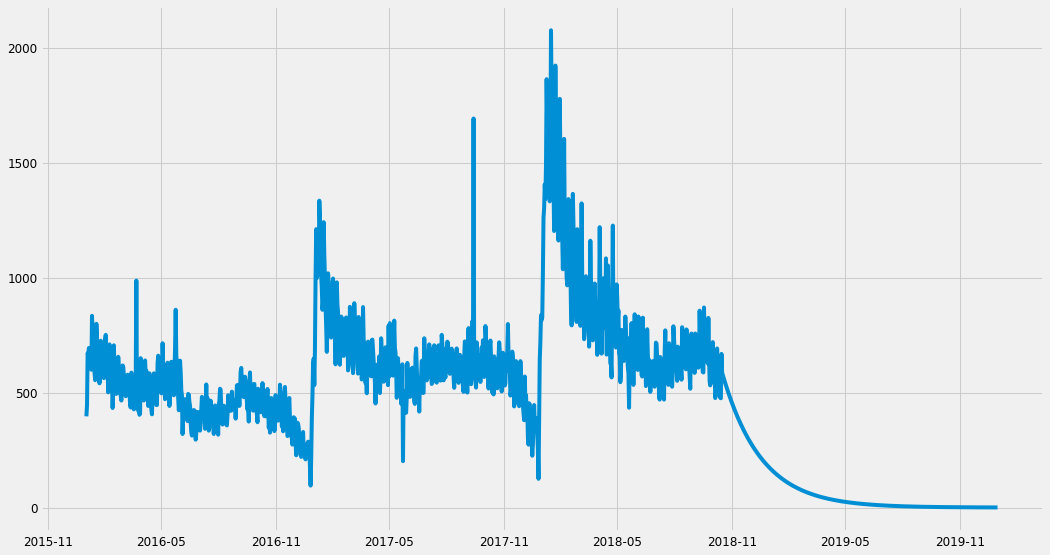

In [32]:
plt.plot(sarima_series)

In [33]:
sarima_series.to_csv("sarima_series-w.csv")

In [13]:
pred_fcst = model_fit.predict(start=1, end=1019, dynamic=False)
sarima_forecast = model_fit.forecast(442)
sarima_series = pred_fcst.append(sarima_forecast)

In [14]:
sarima_series

2018-01-02    23.446047
2018-01-03    14.271340
2018-01-04    12.213244
2018-01-05    13.851634
2018-01-06    17.759083
2018-01-07    19.178160
2018-01-08    20.524239
2018-01-09    17.837910
2018-01-10    20.626256
2018-01-11    20.265371
2018-01-12    15.104610
2018-01-13    14.238776
2018-01-14    17.376607
2018-01-15    12.838414
2018-01-16    16.509706
2018-01-17    17.114041
2018-01-18    18.345647
2018-01-19    16.167632
2018-01-20    13.626344
2018-01-21    12.351237
2018-01-22    14.404189
2018-01-23    12.100153
2018-01-24    18.039093
2018-01-25    19.358680
2018-01-26    19.636242
2018-01-27    12.789286
2018-01-28    14.881187
2018-01-29    17.432467
2018-01-30    11.040855
2018-01-31    10.116970
                ...    
2019-04-08    15.840119
2019-04-09    15.840086
2019-04-10    15.840053
2019-04-11    15.840020
2019-04-12    15.839987
2019-04-13    15.839955
2019-04-14    15.839922
2019-04-15    15.839889
2019-04-16    15.839856
2019-04-17    15.839824
2019-04-18    15

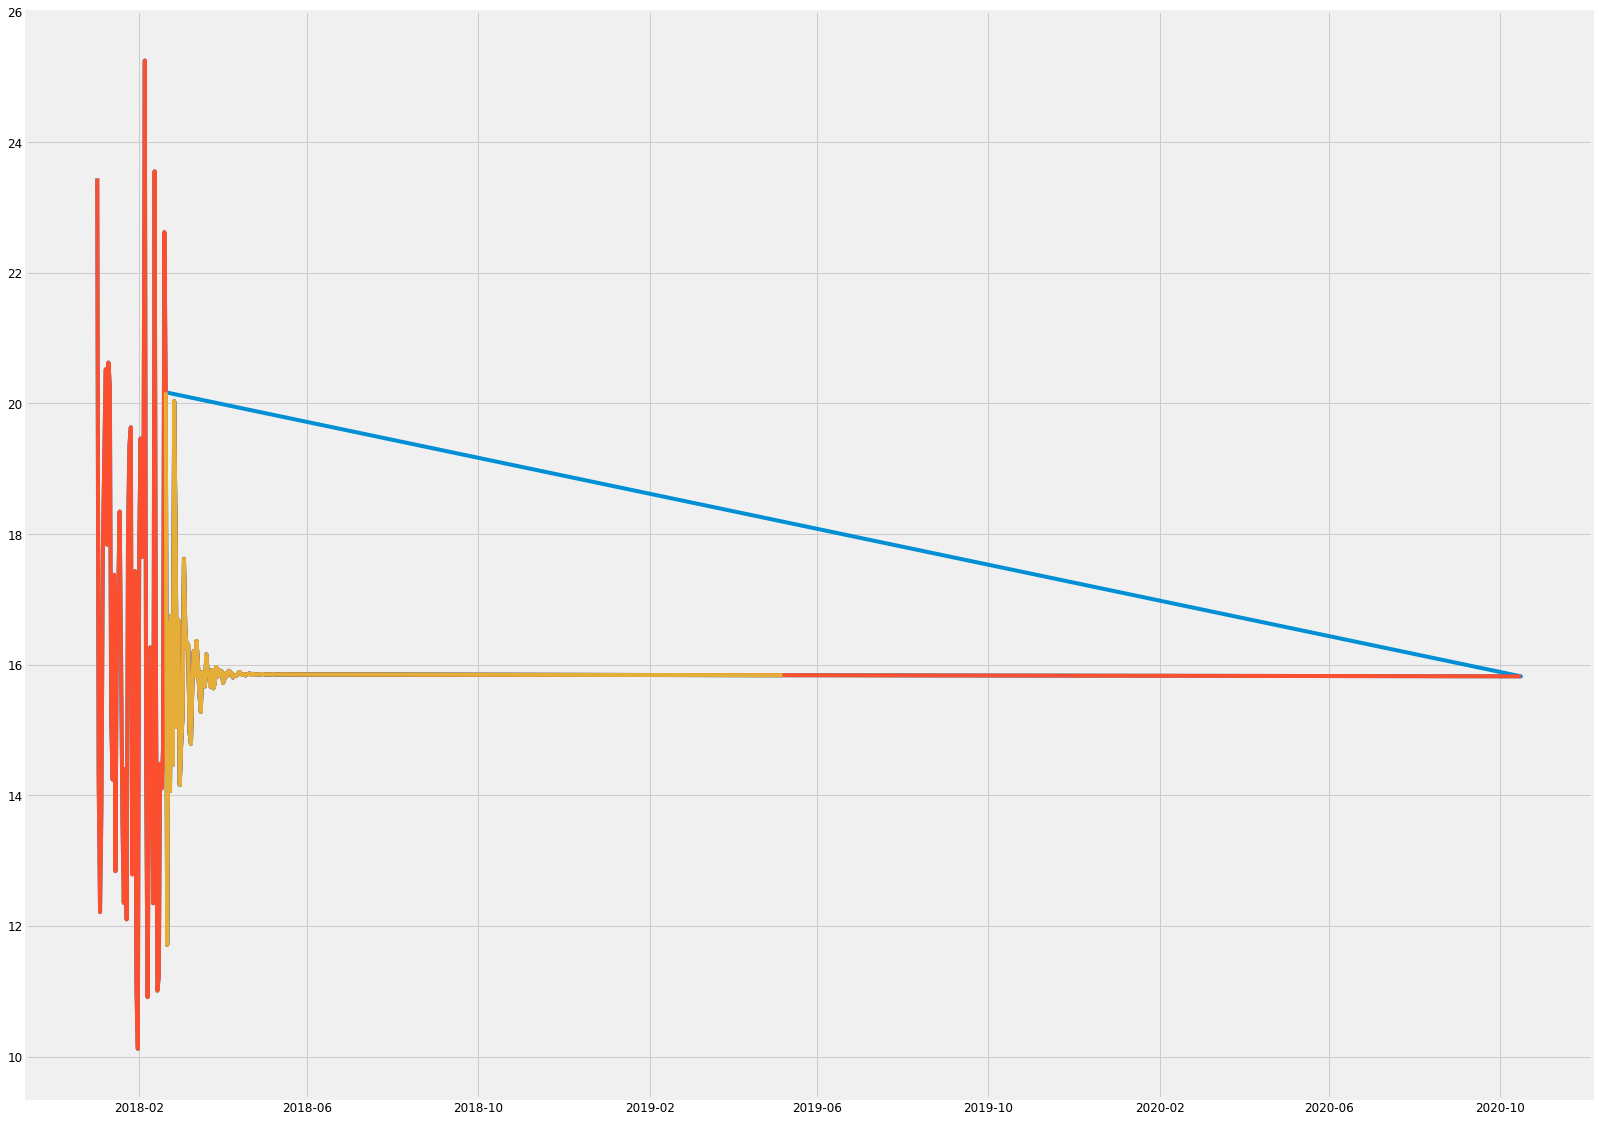

In [15]:
plt.rcParams["figure.figsize"] = [25,20]
plt.plot(sarima_series)
plt.plot(pred_fcst)
plt.plot(sarima_forecast)

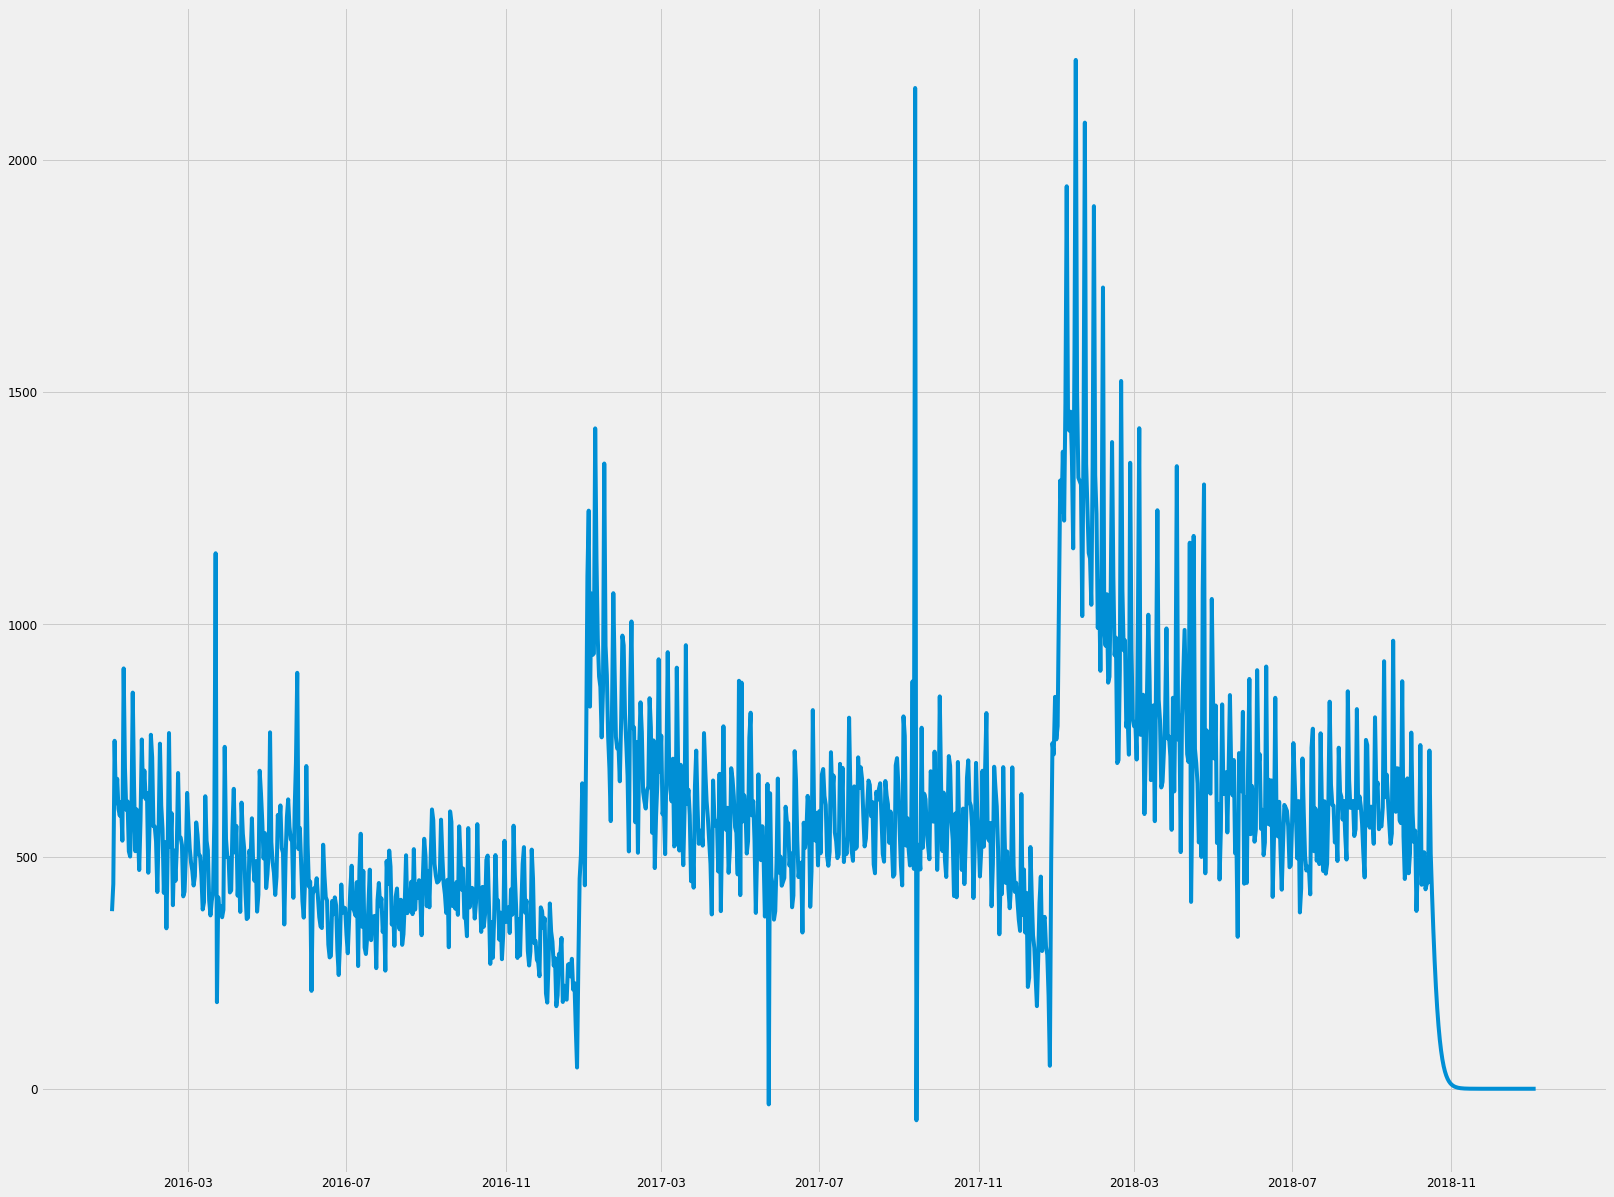

In [29]:
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
pred_fcst = model_fit.predict(start=1, end=1100, dynamic=False)
plt.rcParams["figure.figsize"] = [25,20]
plt.plot(pred_fcst)

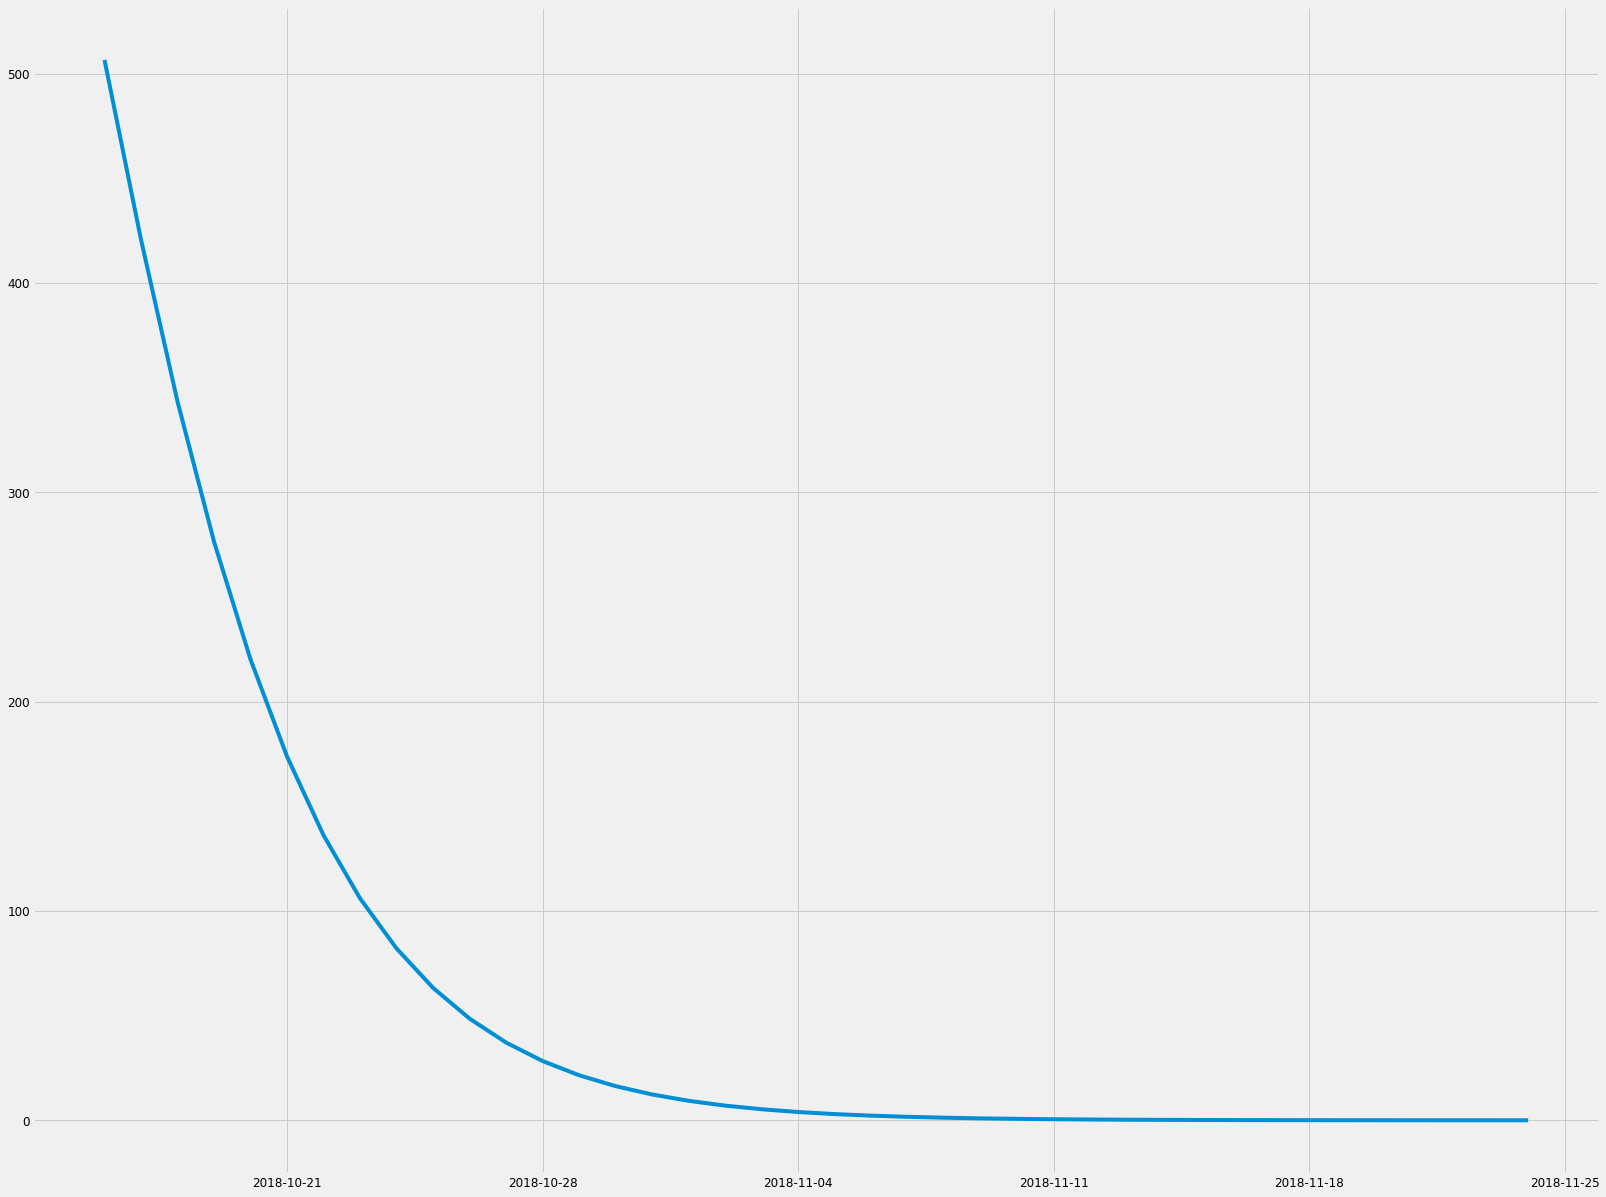

In [30]:
sarima_forecast = model_fit.forecast(40)
plt.plot(sarima_forecast)

In [7]:
p = q = range(1, 3) # Define the p and q parameters to take any value between 0 and 4 (incl 0, excl 4)
d = range(1,2) # Should not be more than 2
pdq = list(itertools.product(p, d, q)) # Combinations of p, d and q
pdq_x_PDQ = [(x[0], x[1], x[2], 1) for x in list(itertools.product(p, d, q))] # Combinations of seasonal P, D and Q
print(pdq)
print(pdq_x_PDQ)

import warnings
warnings.filterwarnings("ignore")

model_params = []
for param in pdq:
    for seasonal_param in pdq_x_PDQ:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            #trend='ct',
                                            order=param,
                                            seasonal_order=seasonal_param,
                                            freq='D',
                                            enforce_stationarity=True,
                                            enforce_invertibility=True)
            results = mod.fit()
            print('SARIMA{}x{} - AIC:{}'.format(param, seasonal_param, results.aic))
            model_params.append((param, seasonal_param, results.aic))
        except:
            continue

model_params.sort(key = lambda tup:tup[2])
for sublist in model_params[:1]:
    pdq = (sublist[:1])
order = pdq[0]
print('order =', order)
for sublist in model_params[:1]:
    PDQ = (sublist[:2])
sorder = PDQ[1]
print('sorder =', sorder)

mod = sm.tsa.statespace.SARIMAX(y, 					
                                #trend='t', 					
                                order=order, 					
                                seasonal_order=sorder,					
                                #freq='D',
                                enforce_stationarity=True,					
                                enforce_invertibility=True)					
results = mod.fit()					
print(results.summary())					


[(1, 1, 1), (1, 1, 2), (2, 1, 1), (2, 1, 2)]
[(1, 1, 1, 1), (1, 1, 2, 1), (2, 1, 1, 1), (2, 1, 2, 1)]
SARIMA(1, 1, 1)x(1, 1, 1, 1) - AIC:12521.243029264526
SARIMA(1, 1, 1)x(1, 1, 2, 1) - AIC:12499.412593245019
SARIMA(1, 1, 1)x(2, 1, 1, 1) - AIC:12475.918663075248
SARIMA(1, 1, 1)x(2, 1, 2, 1) - AIC:12323.391238108288
SARIMA(1, 1, 2)x(1, 1, 1, 1) - AIC:12498.472636293012
SARIMA(1, 1, 2)x(1, 1, 2, 1) - AIC:12521.342350618768
SARIMA(1, 1, 2)x(2, 1, 1, 1) - AIC:12497.252949423859
SARIMA(1, 1, 2)x(2, 1, 2, 1) - AIC:12403.862828147154
SARIMA(2, 1, 1)x(1, 1, 1, 1) - AIC:12475.918348836816
SARIMA(2, 1, 1)x(1, 1, 2, 1) - AIC:12504.50485476568
SARIMA(2, 1, 1)x(2, 1, 1, 1) - AIC:12519.345650707526
SARIMA(2, 1, 1)x(2, 1, 2, 1) - AIC:12309.750533712364
SARIMA(2, 1, 2)x(1, 1, 1, 1) - AIC:12497.689560353054
SARIMA(2, 1, 2)x(1, 1, 2, 1) - AIC:12401.114493903204
SARIMA(2, 1, 2)x(2, 1, 1, 1) - AIC:12273.074212352465
SARIMA(2, 1, 2)x(2, 1, 2, 1) - AIC:12522.20268485773
order = (2, 1, 2)
sorder = (2, 1, 1,

In [66]:
model_params.sort(key = lambda tup:tup[2])
for sublist in model_params[:1]:
    pdq = (sublist[:1])
order = pdq[0]
print('order =', order)
for sublist in model_params[:1]:
    PDQ = (sublist[:2])
sorder = PDQ[1]
print('sorder =', sorder)

order = (5, 0, 5)
sorder = (4, 1, 4, 1)


In [93]:
mod = sm.tsa.statespace.SARIMAX(y, 					
                                #trend='t', 					
                                order=(7,0,7), 					
                                seasonal_order=(7,0,7,7),					
                                #freq='D',
                                enforce_stationarity=False,					
                                enforce_invertibility=False)					
results = mod.fit()					
print(results.summary())					

                                 Statespace Model Results                                
Dep. Variable:                                nb   No. Observations:                 1019
Model:             SARIMAX(7, 0, 7)x(7, 0, 7, 7)   Log Likelihood               -5697.261
Date:                           Mon, 12 Nov 2018   AIC                          11452.522
Time:                                   13:26:28   BIC                          11593.724
Sample:                               01-01-2016   HQIC                         11506.290
                                    - 10-15-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9077      0.558      1.627      0.104      -0.186       2.001
ar.L2         -0.3833      0.859     -0.446

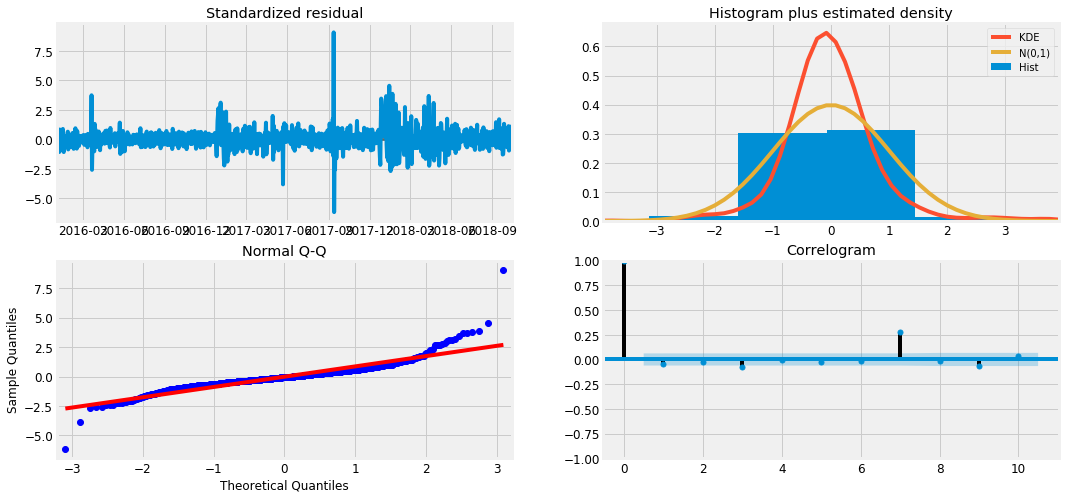

In [8]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

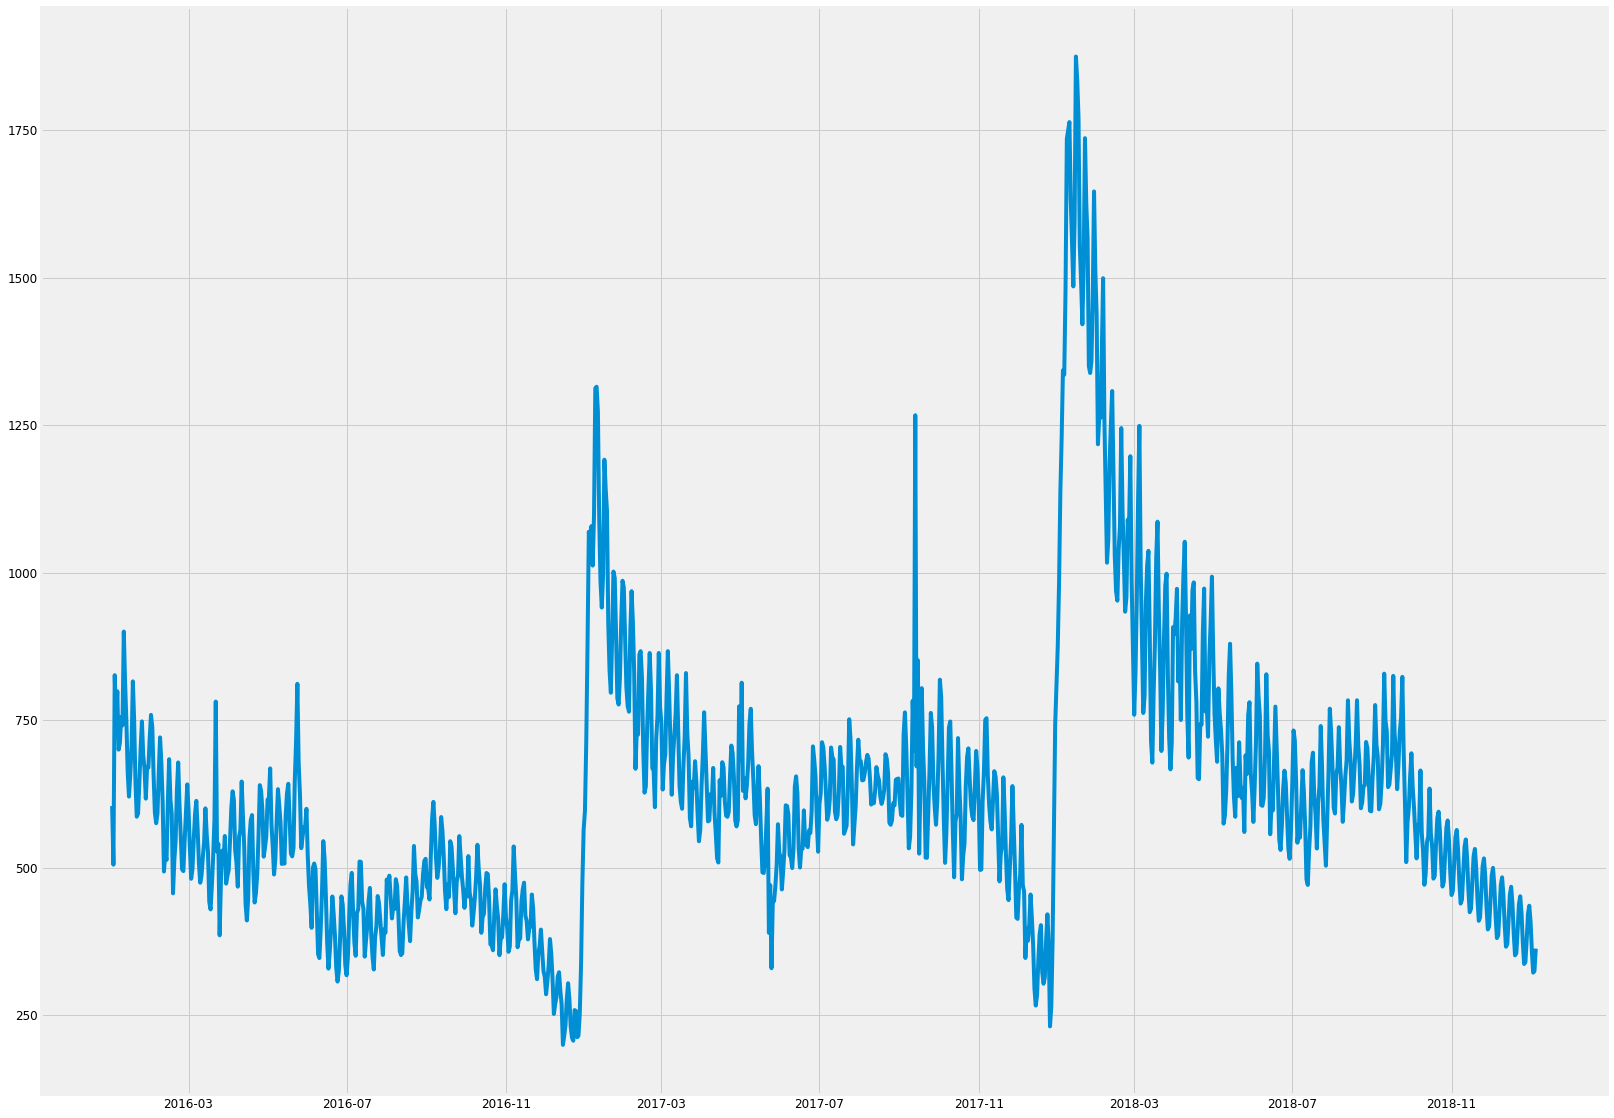

In [10]:
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
pred_fcst = results.predict(start=1, end=1100, dynamic=False)
plt.rcParams["figure.figsize"] = [25,20]
plt.plot(pred_fcst)

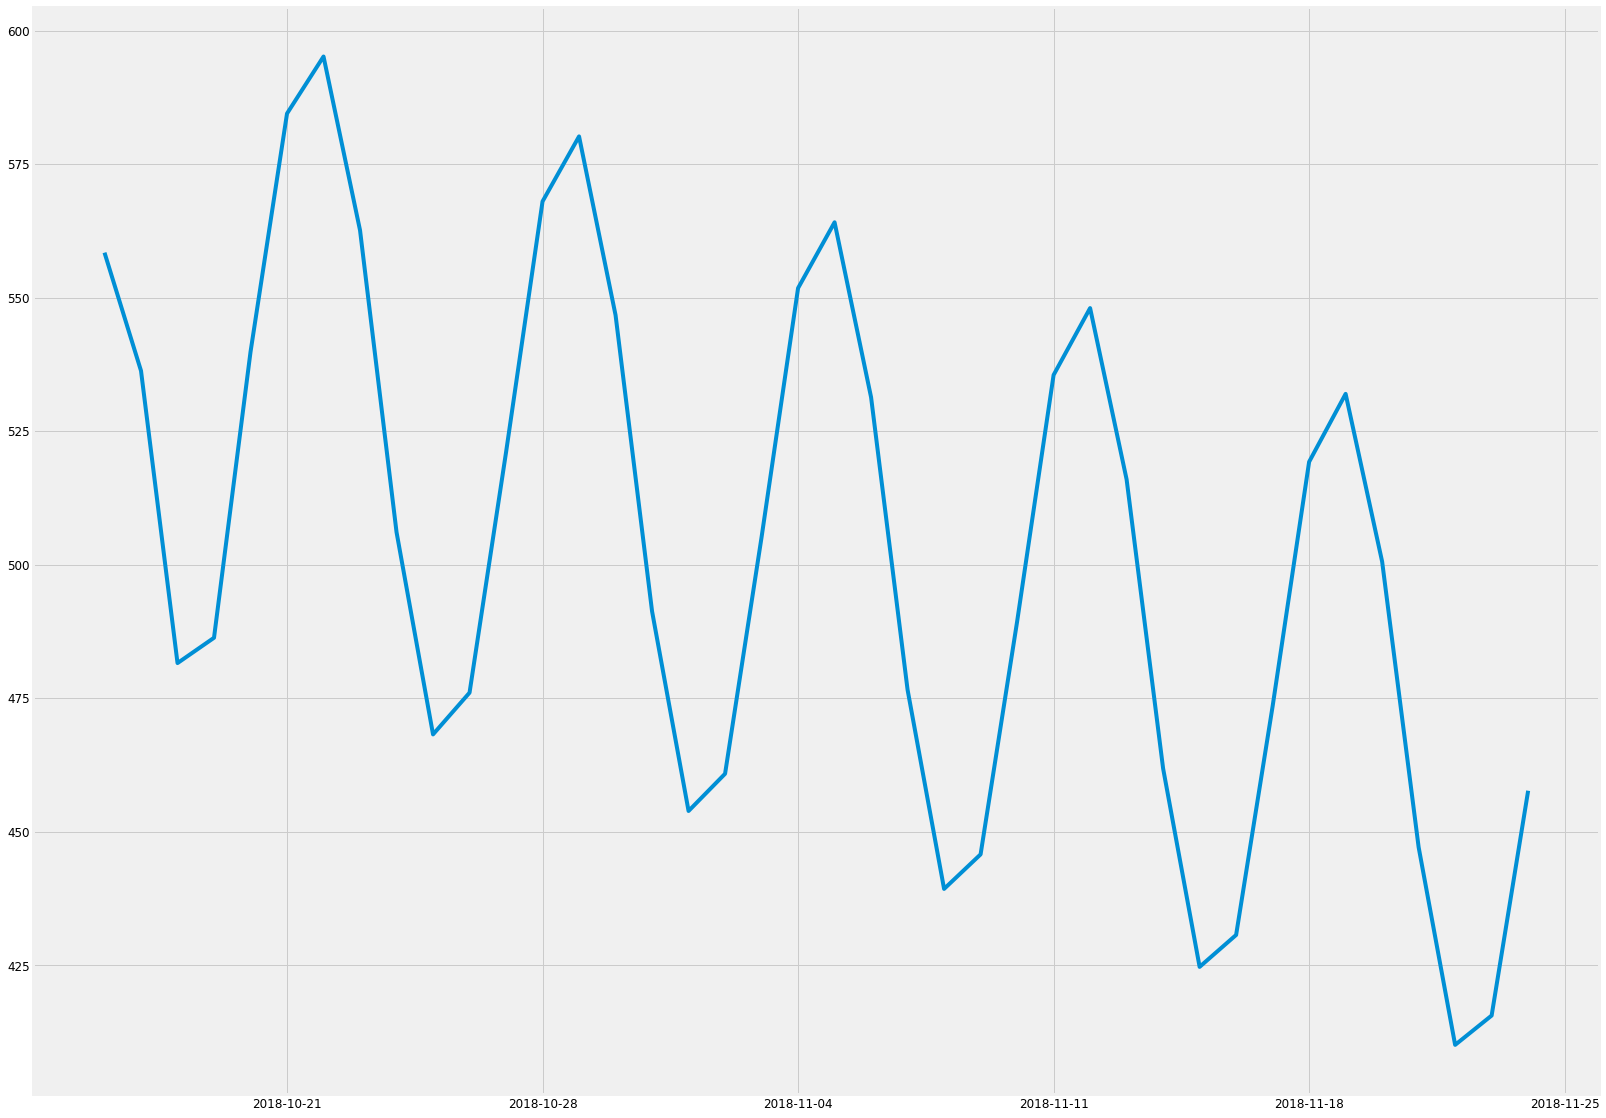

In [12]:
sarima_forecast = results.forecast(40)
plt.plot(sarima_forecast)

In [97]:
pdf = pd.DataFrame(pred_fcst)
pdf.to_csv("predict_sarima.csv")

pdf1 = pd.DataFrame(sarima_forecast)
pdf1.to_csv("forecast_sarima.csv")


In [ ]:
import warnings
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# evaluate a SARIMA model for a given order (p,d,q), (P,D,Q,m)
def evaluate_sarima_model(X, order, sorder, m):
	history = [x for x in X]
	# make predictions
	predictions = list()
	for t in range(len(X)):
		model = sm.tsa.statespace.SARIMAX(series,order=order,
                                  seasonal_order=sorder,
                                  enforce_stationarity=True,
                                  enforce_invertibility=True)
		model_fit = model.fit(transparams=True)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(X[t])
	# calculate out of sample error
	error = mean_squared_error(X, predictions)
	mape = np.mean(abs((X-predictions)/X))
	return error
	return mape

# evaluate combinations of p, d, q, P, D, Q, m values for a SARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_params = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_sarima_model(dataset, order, sorder, m)
					if mse < best_score:
						best_score, best_params = mse, order
					print('ARIMA %s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA %s MSE=%.3f' % (best_params, best_score))
	model_params = [p,d,q]
	print("best order =", model_params)
	with open('model_params.json','w') as out_params:
		json.dump(model_params, out_params)

# load dataset
series = y['nb']

# evaluate parameters
p_values = range(0, 4)
d_values = range(0, 4)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

# select the best set of p,d,q
with open('model_params.json') as json_file:
    out_params = json.load(json_file)
out_params
p = out_params[0]
d = out_params[1]
q = out_params[2]

# apply model
model = sm.tsa.statespace.SARIMAX(series,order=(p,d,q),
                                  seasonal_order=(P,D,Q,m),
                                  enforce_stationarity=True,
                                  enforce_invertibility=True)
model_fit = model.fit(transparams=True)
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
#pyplot.show()
residuals.plot(kind='kde')
#pyplot.show()
plt.savefig('residuals.png')
print(residuals.describe())

# Plot 'real' vs. 'predictions'
import numpy as np
X = series.values
history = [x for x in X]
predictions = list()
for t in range(len(X)):
	model = ARIMA(history, order=(p,d,q))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = X[t]
	history.append(obs)
# plot
pyplot.plot(X)
pyplot.plot(predictions, color='red')
#pyplot.show()
pyplot.savefig('sarima - real vs predictions.png')

# compute MAPE
pf = pd.DataFrame(predictions)
xf = pd.DataFrame(X)
dff = pd.concat([pf,xf],axis=1)
dff.columns = ['predict_sarima', 'real']
dff['abspctdiff'] = abs(dff['predict_sarima']-dff['real'])/dff['real']
mape_sarima = np.mean(dff['abspctdiff'])
print("mape_sarima = ", mape_sarima)

# Get forecast 442 steps ahead in future (10/15/2018 to 12/31/2019)
pred_forecast = model_fit.forecast(steps=442)
pdf = pd.DataFrame(pred_forecast[0])
pdf.to_csv("forecasts_sarima.csv")

In [ ]:
# backup of this code

def evaluate_sarima_params(dataset, pdq, pdq_x_PDQ):
    dataset = dataset.astype('float32')
    best_score, best_params, best_seasonal_params = float("inf"), None, None
    for param in pdq:
        for seasonal_param in pdq_x_PDQ:
            order = param
            sorder = seasonal_param
            try:
                mse = evaluate_sarima_model(dataset, order, sorder)
                if mse < best_score:
                    best_score, best_params, best_seasonal_params = mse, order, sorder
                print(order, sorder, mse)
            except:
                continue
    print('Best SARIMA %s MSE=%.3f' % (best_params, best_seasonal_params, best_score))
    model_params = [p,d,q]
    model_seasonal_params = [P,D,Q]
    print("best order & sorder =", model_params, model_seasonal_params)
    with open('model_params.json','w') as out_params:
        json.dump(model_params, out_params)
    with open('model_seasonal_params.json','w') as out_seasonal_params:
        json.dump(model_seasonal_params, out_seasonal_params)

